# NYC Restaurant - EDA

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Importing Dataset

The data set can be found here = https://www.kaggle.com/datasets/ahsan81/food-ordering-and-delivery-app-dataset

In [2]:
df = pd.read_csv("food_order.csv")
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [4]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [5]:
columns = df.columns
columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [6]:
df.restaurant_name.unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

## Data Cleaning

### Restaurant names with mistakes

* Big Wong Restaurant \x8c_¤¾Ñ¼
* Empanada Mama (closed)
* Chipotle Mexican Grill $1.99 Delivery
* Joe's Shanghai \x8e_À\x8eü£¾÷´
* Dirty Bird To Go (archived)
* CafÌ© China

In [7]:
# Replace the wrong names with new names with correct values
wrong_names = ['Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Chipotle Mexican Grill $1.99 Delivery',
               "Joe's Shanghai \x8e_À\x8eü£¾÷´", 'Dirty Bird To Go (archived)', 'CafÌ© China']

new_names = ['Big Wong Restaurant', 'Empanada Mama', 'Chipotle Mexican Grill', "Joes Shanghai", 'Dirty Bird To Go', 'Cafe China']
df['restaurant_name'] = df['restaurant_name'].replace(wrong_names, new_names)

In [8]:
# Confirm the changes

df.restaurant_name.unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill', 'Big Wong Restaurant',
       'Empanada Mama', 'Pylos', "Lucky's Famous Burgers", 'Shake Shack',
       'Sushi of Gari', 'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill', 'RedFarm Broadway',
       'Cafeteria', 'DuMont Burger', "Sarabeth's East",
       'Hill Country Fried Chicken', 'Bistango', "Jack's Wife Freda",
       "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Brooklyn', 'Nobu Next Door', 'Osteria Morin

In [9]:
df.cuisine_type.unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

**Change 'Not given' as NaN**

In [10]:
# Change 'Not given' as NaN
df['rating'] = df['rating'].replace('Not given', np.nan)
df['rating'] = df['rating'].astype(float)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [11]:
df['order_time_total'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,order_time_total
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


In [12]:
df.duplicated().sum()

0

In [13]:
df.order_id.nunique()

1898

In [14]:
df.customer_id.nunique()

1200

In [15]:
df.groupby('cuisine_type').size()

cuisine_type
American          584
Chinese           215
French             18
Indian             73
Italian           298
Japanese          470
Korean             13
Mediterranean      46
Mexican            77
Middle Eastern     49
Southern           17
Spanish            12
Thai               19
Vietnamese          7
dtype: int64

## 2. Data Analysis

### Top 10 restaurants that receive the most orders.

<AxesSubplot:xlabel='order_id', ylabel='restaurant_name'>

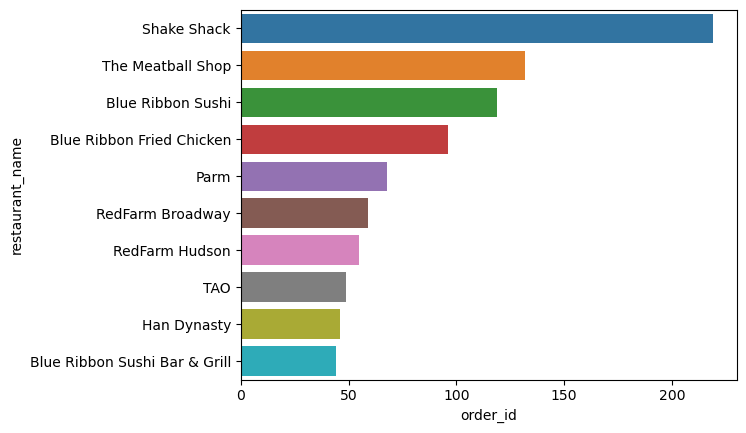

In [16]:
restaurant = df[['restaurant_name', 'order_id']].groupby('restaurant_name').agg('count').sort_values('order_id', ascending = False).reset_index()
sns.barplot(data = restaurant.head(10), x = "order_id", y = "restaurant_name")

### Top 10 Cuisine Type that receive the most orders.

<AxesSubplot:xlabel='count', ylabel='cuisine_type'>

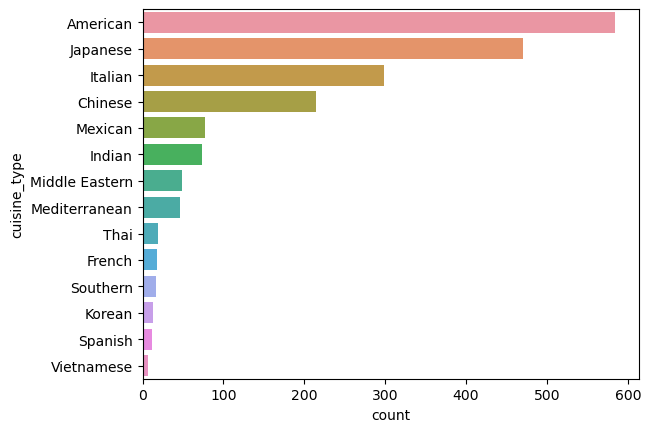

In [17]:
sns.countplot(y = 'cuisine_type', 
              data = df,
              order = df['cuisine_type'].value_counts().index)

**Percentage for orders by Cuisine Type**

In [18]:
df.cuisine_type.value_counts(normalize = True) * 100

American          30.769231
Japanese          24.762908
Italian           15.700738
Chinese           11.327713
Mexican            4.056902
Indian             3.846154
Middle Eastern     2.581665
Mediterranean      2.423604
Thai               1.001054
French             0.948367
Southern           0.895680
Korean             0.684932
Spanish            0.632244
Vietnamese         0.368809
Name: cuisine_type, dtype: float64

### Compare the weekday and weekend orders

,day_of_the_week,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,rating,food_preparation_time,delivery_time,order_time_total
0,Weekday,547,547,547,547,547,340,547,547,547
1,Weekend,1351,1351,1351,1351,1351,822,1351,1351,1351


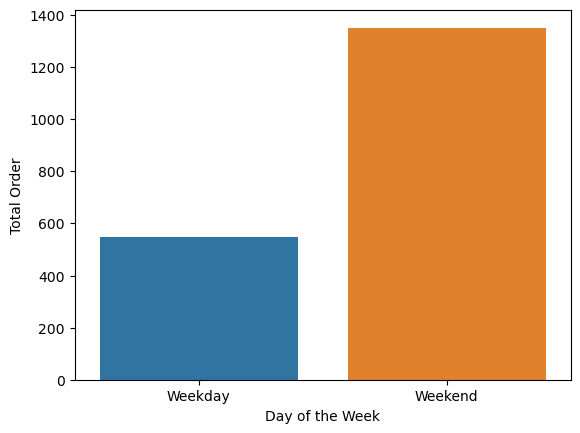

In [19]:
# check bussiest day
order_count = df.groupby('day_of_the_week').count()
order_count = order_count.reset_index('day_of_the_week')

# bar graph
compare_orders_graph = sns.barplot(x = 'day_of_the_week', y = 'order_id', data = order_count)
compare_orders_graph.set(xlabel = 'Day of the Week', ylabel = 'Total Order')
order_count

**Percentage for day of the week**

In [20]:
df.day_of_the_week.value_counts(normalize = True)*100

Weekend    71.18019
Weekday    28.81981
Name: day_of_the_week, dtype: float64

**Delievery Time**
* Average Delivery Time Between 20 - 28 Minutes

In [21]:
df.delivery_time.describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

**Food Preparation Time**
* Average Food Preparation Time Between 23 - 31 Minutes

In [22]:
df.food_preparation_time.describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

**Total Time For Order**
* Average Total Time Between 47 - 56 Minutes

In [23]:
df.order_time_total.describe()

count    1898.000000
mean       51.533720
std         6.833603
min        35.000000
25%        47.000000
50%        52.000000
75%        56.000000
max        68.000000
Name: order_time_total, dtype: float64

### Order Histogram

<AxesSubplot:xlabel='order_time_total', ylabel='Count'>

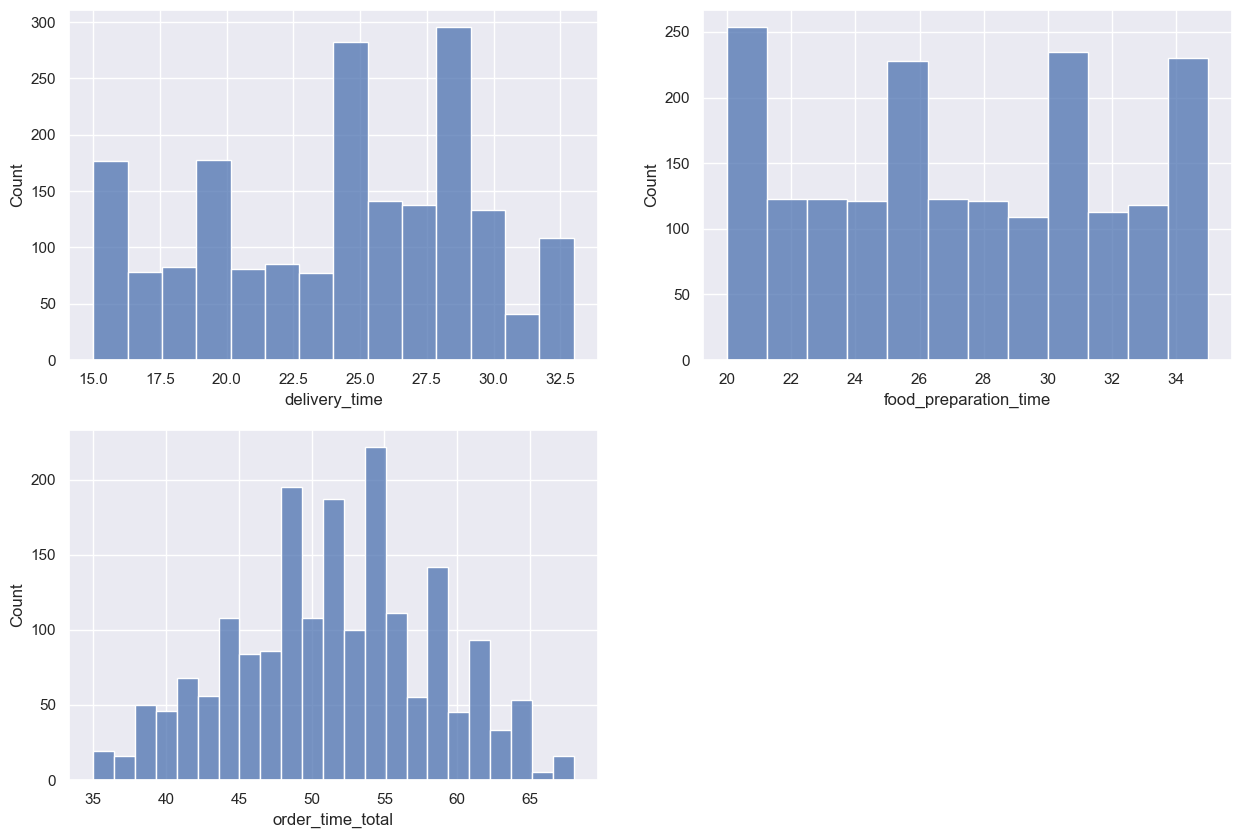

In [24]:
plt.figure(figsize = (15,10))
sns.set()

plt.subplot(2,2,1)
sns.histplot(df['delivery_time'])

plt.subplot(2,2,2)
sns.histplot(df['food_preparation_time'])

plt.subplot(2,2,3)
sns.histplot(df['order_time_total'])

### Total Time By Cuisine Type

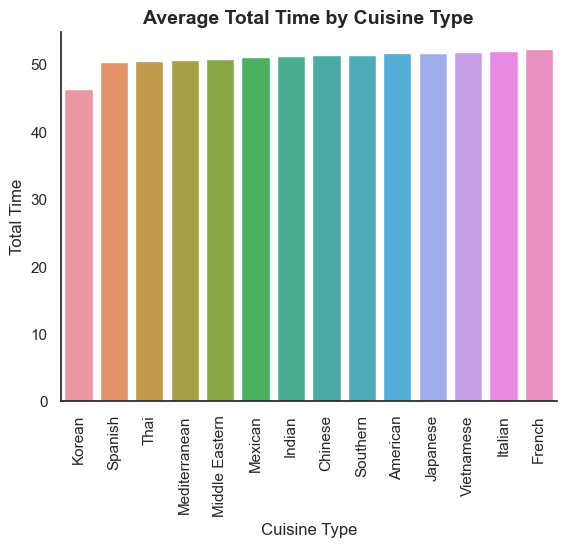

In [25]:
average_delivery_time_cuisine = df.groupby('cuisine_type').mean()
average_delivery_time_cuisine = average_delivery_time_cuisine.reset_index('cuisine_type')

# graph
sns.set_style('white')
average_delivery_time_cuisine_graph = sns.barplot(x = 'cuisine_type',
                                                  y = 'order_time_total',
                                                  data = average_delivery_time_cuisine,
                                                  order = average_delivery_time_cuisine.sort_values('order_time_total').cuisine_type)
plt.setp(average_delivery_time_cuisine_graph.get_xticklabels(),
         rotation = 90)
plt.title("Average Total Time by Cuisine Type", fontsize = 14, weight = "bold")
average_delivery_time_cuisine_graph.set(xlabel = 'Cuisine Type', ylabel = 'Total Time')
sns.despine()

plt.show()

### Cost

In [26]:
df.cost_of_the_order.describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

**Cost of the order Histogram**

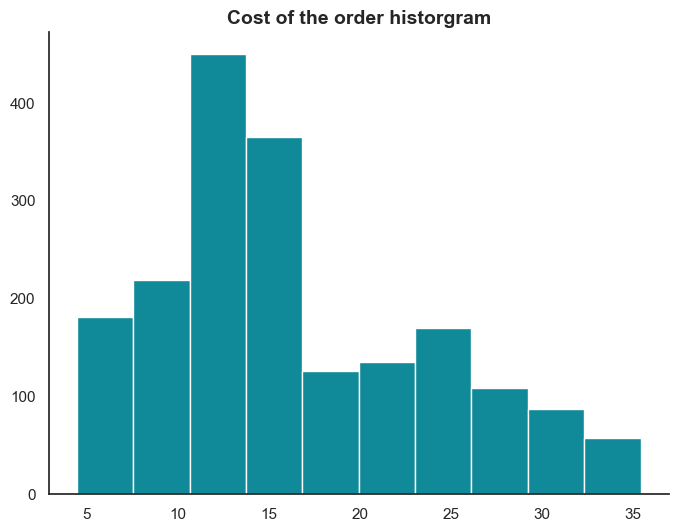

In [27]:
plt.figure(figsize = (8, 6))
plt.hist(df.cost_of_the_order,
         color = "#108A99")
plt.title("Cost of the order historgram", fontsize = 14, weight = "bold")
sns.despine()
plt.show()

**Cost of the order Boxplot**

<AxesSubplot:title={'center':'Cost of the order'}, xlabel='cost_of_the_order'>

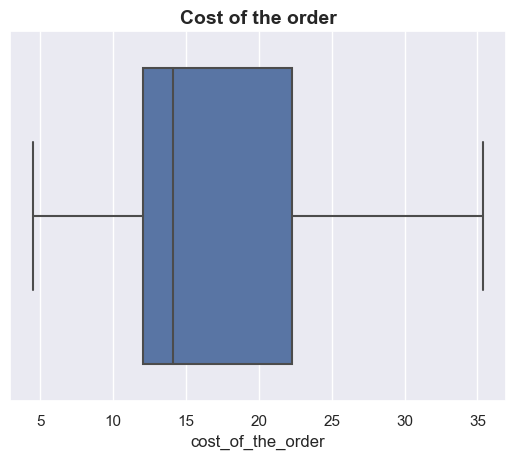

In [28]:
sns.set()
plt.title('Cost of the order', fontsize = 14, weight = "bold")
sns.boxplot(x = df.cost_of_the_order)

### Rating by Cuisine

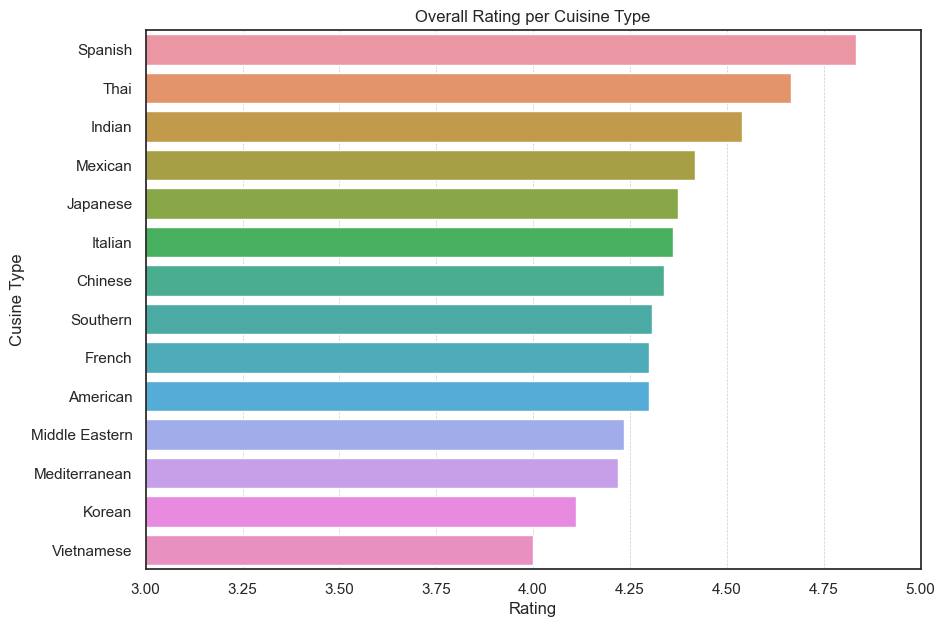

In [29]:
sns.set_style("white")
plt.figure(figsize=(10,7))
cuisine_rating = df.groupby('cuisine_type').mean().sort_values('rating', ascending = False).reset_index()
sns.barplot(data = cuisine_rating, 
            x = 'rating', 
            y = 'cuisine_type', 
            ci = False
            )
plt.xlabel('Rating')
plt.ylabel('Cusine Type')
plt.xlim(3,5)
plt.xticks(np.arange(3, 5.25, .25))
plt.title('Overall Rating per Cuisine Type')
plt.grid(axis = 'x', linestyle = '--', linewidth = 0.5)
plt.show()

### Cost by Cuisine

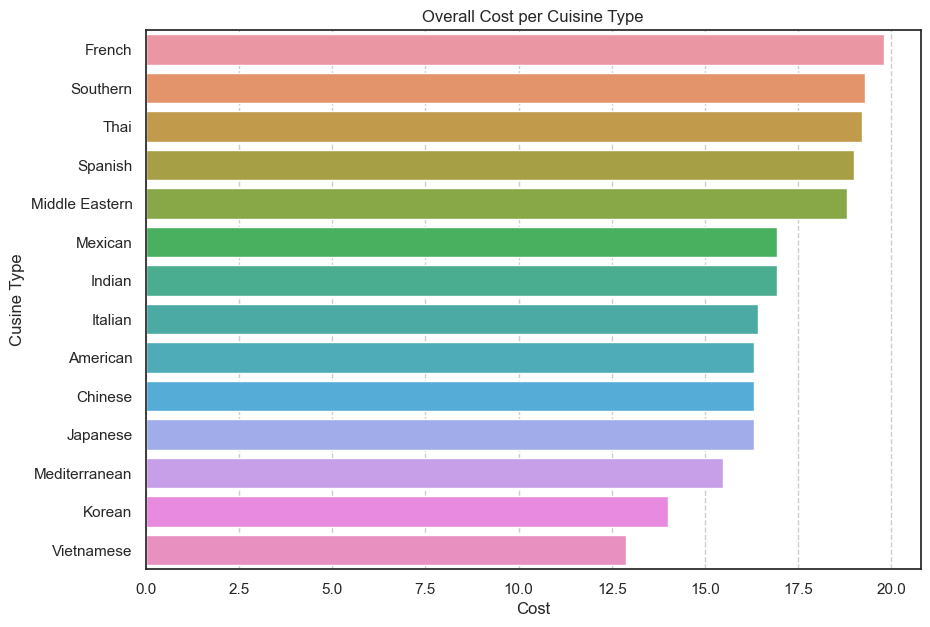

In [30]:
plt.figure(figsize=(10,7))
cuisine_cost = df.groupby('cuisine_type').mean().sort_values('cost_of_the_order', ascending = False).reset_index()
sns.barplot(data = cuisine_cost, 
            x = 'cost_of_the_order', 
            y = 'cuisine_type', 
            ci = False
            )
plt.xlabel('Cost')
plt.ylabel('Cusine Type')
plt.title('Overall Cost per Cuisine Type')
plt.grid(axis = 'x', linestyle = '--')
plt.show()

### Correlation between the variables

<AxesSubplot:>

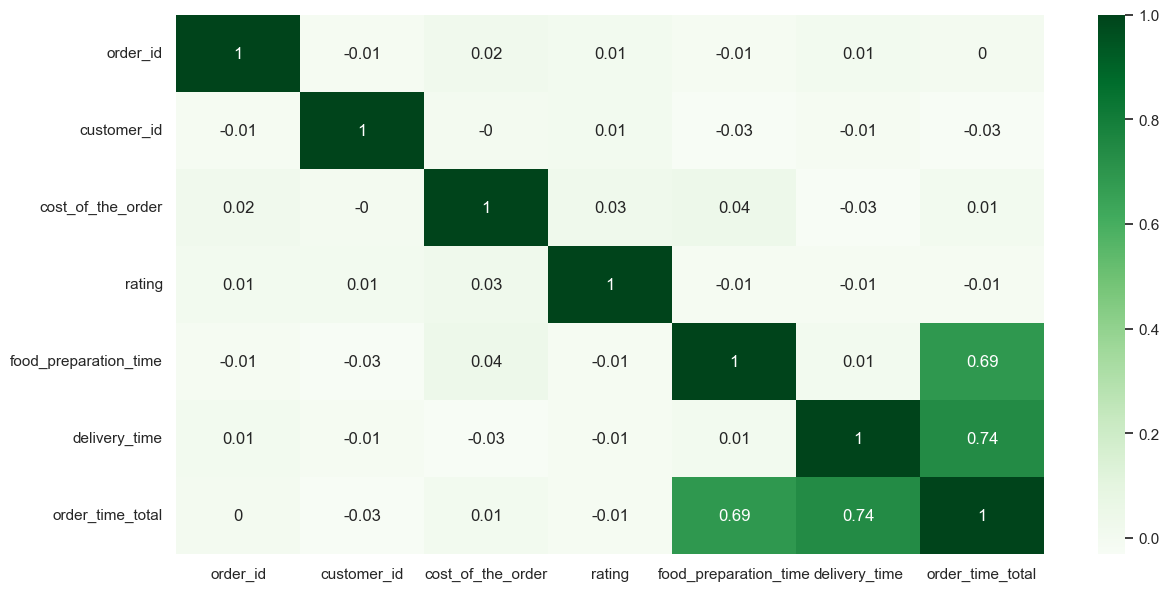

In [31]:
correlation = df.corr().round(2)
plt.figure(figsize = (14, 7))
sns.heatmap(correlation, annot = True, cmap = "Greens")

## 3. Conclusion

What is the most popular order in NYC?

* American.

What is the average cost per meal in NYC?
* 16.50.

What is the fastest type of cuisine that the customer can get when hungry?
* Korean.

Does the cost of the restaurant's orders affect the rating of the restaurant?
* No, as we look at the correlation chart above, we can see that there is no significant correlation between the rating and the cost of the order.